### Background:
Yammer is a social network for communicating with coworkers. Individuals share documents, updates, and ideas by posting them in groups. Yammer is free to use indefinitely, but companies must pay license fees if they want access to administrative controls, including integration with user management systems like ActiveDirectory.   

**Event Time**: Tuesday morning, September 2, 2014   

#### What caused the drop in user engagement? 
- email clickthrough is strongly associated with the drop.
- drop in phone and tablet users were more significant than computer users.
- no significant difference in location.
- drop in Type 1 and 2 users were more apparent than Type 3.

#### Based on what you observe in the data, what recommendations would you make to the organization? 
- since tablet and phone likely share the same app, the app may have malfunction, highly like caused by email link.
- possible cause: weekly digest email had broken link

Keywords: time-series analysis (descriptive analytics), visualization (e.g. Bokeh)

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import math
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import DatetimeTickFormatter
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_user = pd.read_csv('yammer_users.txt')
df_event1, df_event2 = pd.read_csv('yammer_events_1.txt') , pd.read_csv('yammer_events_2.txt')
df_email = pd.read_csv('yammer_emails.txt')

In [3]:
# merge df_event1 and df_event2
df_event=pd.concat([df_event1,df_event2])

In [4]:
df_user.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [5]:
df_email.tail()

,user_id,occurred_at,action,user_type
90384,18814.0,2014-08-31 12:12:26,email_open,3.0
90385,18814.0,2014-08-31 12:12:57,email_clickthrough,3.0
90386,18815.0,2014-08-31 13:39:56,sent_reengagement_email,2.0
90387,18815.0,2014-08-31 13:40:14,email_open,2.0
90388,18815.0,2014-08-31 13:40:47,email_clickthrough,2.0


In [6]:
df_event.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


# convert string to date time

In [7]:
# convert time date
def time_convert(column):
    "convert time to date time format"
    import pandas as pd
    return pd.to_datetime(column);

In [8]:
df = (df_user['created_at'], df_user['activated_at'], df_email['occurred_at'], df_event['occurred_at'])
for i in df:
    i = time_convert(i);

In [9]:
df_event['occurred_at'] = time_convert(df_event['occurred_at'])

In [10]:
type( df_email['occurred_at'].iloc[2])

str

In [11]:
df_user['created_at'] = pd.to_datetime(df_user['created_at'])
df_user['activated_at'] = pd.to_datetime(df_user['activated_at'])
df_email['occurred_at'] = pd.to_datetime(df_email['occurred_at'])
df_event['occurred_at'] = pd.to_datetime(df_event['occurred_at'])

# Engagement

In [12]:
# daily engagement
daily = df_event[(df_event.event_name=='login')&(df_event.event_type=='engagement')]

In [13]:
daily.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
6,6,10612.0,2014-05-01 09:59:46,engagement,login,Netherlands,iphone 5,1.0
18,18,10736.0,2014-05-09 17:52:45,engagement,login,Austria,iphone 4s,2.0
21,21,10965.0,2014-05-15 13:52:59,engagement,login,Finland,windows surface,3.0
23,23,11020.0,2014-05-08 09:15:35,engagement,login,Japan,macbook air,2.0


In [14]:
# weekly engagement 
weekly = daily.set_index('occurred_at').groupby(pd.Grouper(freq='W')).user_id.nunique()

In [15]:
x = weekly.index
y = weekly.values

output_notebook()
fig = figure(plot_width=500, plot_height=300, x_axis_type='datetime',
             title='Count of weekly active users',
             y_axis_label='Counts', x_axis_label='Time (weekly)')
fig.scatter(x, y)
fig.line(x, y)
#fig.xaxis.axis.formatter = DatetimeTickFormatter(format='%W')
show(fig)

Loading BokehJS ...

In [16]:
daily.head(1)

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0


In [17]:
pd.unique(daily.location)

array(['Japan', 'Netherlands', 'Austria', 'Finland', 'United Kingdom',
       'India', 'United States', 'France', 'Iran', 'Germany', 'Australia',
       'Brazil', 'Thailand', 'Russia', 'Taiwan', 'Canada', 'Spain',
       'Israel', 'Colombia', 'Iraq', 'Indonesia', 'Korea',
       'United Arab Emirates', 'Belgium', 'Saudi Arabia', 'Sweden',
       'Poland', 'Mexico', 'Italy', 'Egypt', 'Nigeria', 'Pakistan',
       'Portugal', 'Venezuela', 'Hong Kong', 'Switzerland', 'Denmark',
       'Norway', 'Greece', 'Ireland', 'South Africa', 'Malaysia',
       'Philippines', 'Argentina', 'Turkey', 'Singapore', 'Chile'],
      dtype=object)

In [18]:
len(pd.unique(daily.location))

47

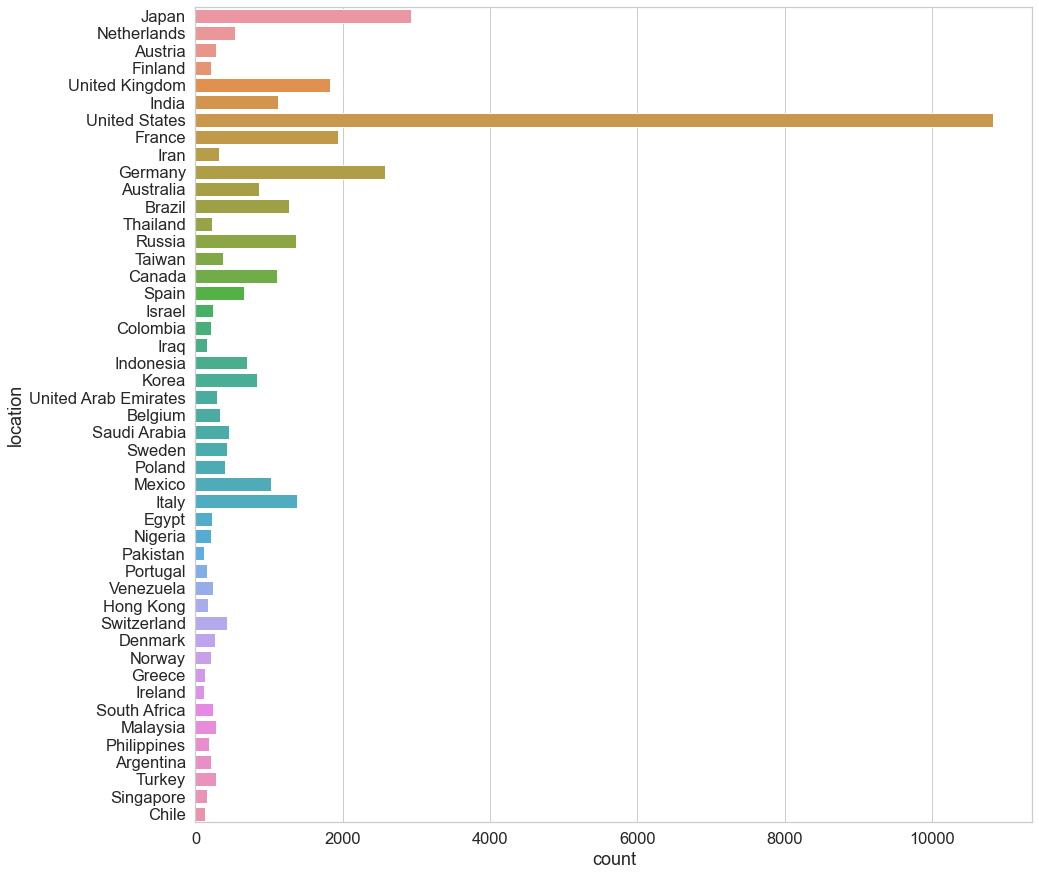

In [19]:
sns.set_theme(style='whitegrid', font_scale=1.5)
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.countplot(y='location', data=daily)

In [20]:
# location
group_num = len(pd.unique(daily.location))
group = pd.unique(daily.location)

output_notebook()
for cls in group:
    daily_cls = daily.loc[daily.location==cls]
    weekly_cls = daily_cls.set_index('occurred_at').groupby(pd.Grouper(freq='W')).user_id.nunique()
    x = weekly_cls.index
    y = weekly_cls.values
    fig = figure(plot_width=500, plot_height=300, x_axis_type='datetime',
             title='Count of weekly active users',
             y_axis_label='Counts', x_axis_label='Time (weekly)')
    fig.scatter(x, y)
    fig.line(x, y)
    print(cls)
    show(fig)

Loading BokehJS ...

Japan


Netherlands


Austria


Finland


United Kingdom


India


United States


France


Iran


Germany


Australia


Brazil


Thailand


Russia


Taiwan


Canada


Spain


Israel


Colombia


Iraq


Indonesia


Korea


United Arab Emirates


Belgium


Saudi Arabia


Sweden


Poland


Mexico


Italy


Egypt


Nigeria


Pakistan


Portugal


Venezuela


Hong Kong


Switzerland


Denmark


Norway


Greece


Ireland


South Africa


Malaysia


Philippines


Argentina


Turkey


Singapore


Chile


# It appears that users in most countries were having similar pattern

### Majority of users were from USA

In [21]:
pd.unique(daily.device)

array(['dell inspiron notebook', 'iphone 5', 'iphone 4s',
       'windows surface', 'macbook air', 'iphone 5s', 'macbook pro',
       'kindle fire', 'ipad mini', 'nexus 7', 'nexus 5',
       'samsung galaxy s4', 'lenovo thinkpad', 'samsumg galaxy tablet',
       'acer aspire notebook', 'asus chromebook', 'samsung galaxy note',
       'mac mini', 'hp pavilion desktop', 'ipad air', 'htc one',
       'dell inspiron desktop', 'amazon fire phone',
       'acer aspire desktop', 'nokia lumia 635', 'nexus 10'], dtype=object)

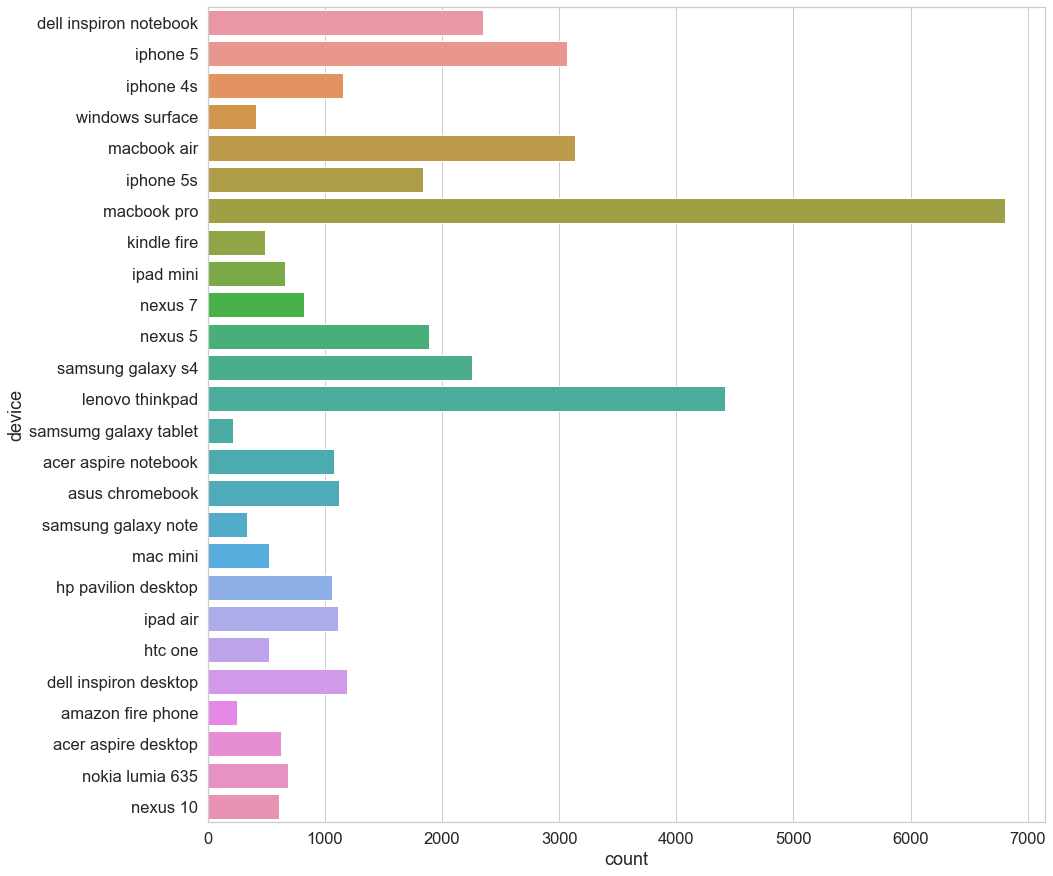

In [22]:
sns.set_theme(style='whitegrid', font_scale=1.5)
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.countplot(y='device', data=daily)

In [23]:
pd.unique(daily.user_type)

array([3., 1., 2.])

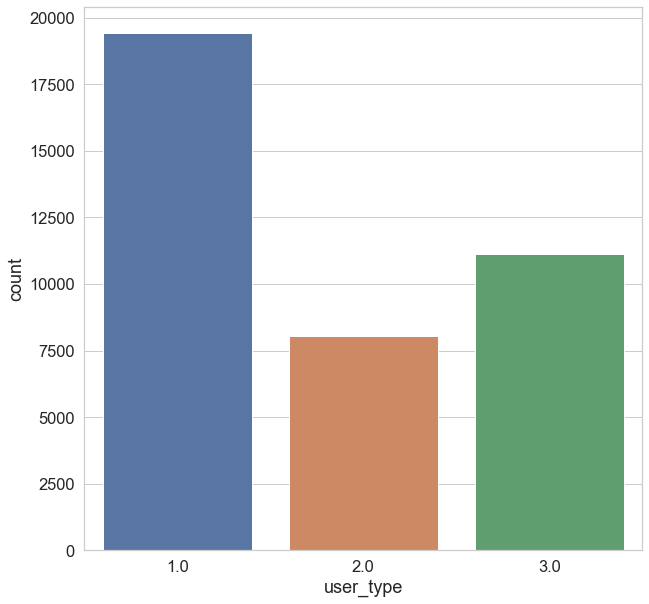

In [24]:
sns.set_theme(style='whitegrid', font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='user_type', data=daily)

In [25]:
# device_type
group_num = len(pd.unique(daily.user_type))
group = pd.unique(daily.user_type)

output_notebook()

for cls in group:
    daily_cls = daily.loc[daily.user_type==cls]
    weekly_cls = daily_cls.set_index('occurred_at').groupby(pd.Grouper(freq='W')).user_id.nunique()
    x = weekly_cls.index
    y = weekly_cls.values
    fig = figure(plot_width=500, plot_height=300, x_axis_type='datetime',
             title='Count of weekly active users',
             y_axis_label='Counts', x_axis_label='Time (weekly)')
    fig.scatter(x, y)
    fig.line(x, y)
    print(cls)
    show(fig)

Loading BokehJS ...

3.0


1.0


2.0


# Regardless of user type, similar pattern

In [26]:
phone=['iphone 5','samsung galaxy s4','nexus 5','iphone 5s','iphone 4s','nokia lumia 635', 'htc one',\
       'samsung galaxy note','amazon fire phone']
computer=['macbook pro','lenovo thinkpad','macbook air','dell inspiron notebook', 'asus chromebook',\
          'dell inspiron desktop','acer aspire notebook','hp pavilion desktop','acer aspire desktop','mac mini']
tablet=['ipad air','nexus 7','ipad mini','nexus 10','kindle fire','windows surface','samsumg galaxy tablet']

In [27]:
device_type_list=[]
for device in daily['device']:
    if device in phone:
        device_type_list.append('phone')
    if device in computer:
        device_type_list.append('computer')
    if device in tablet:
        device_type_list.append('tablet')

In [28]:
print(daily['device'].head(10), device_type_list[:10])

0     dell inspiron notebook
6                   iphone 5
18                 iphone 4s
21           windows surface
23               macbook air
31                 iphone 4s
40                 iphone 5s
50               macbook pro
55               kindle fire
58                 ipad mini
Name: device, dtype: object ['computer', 'phone', 'phone', 'tablet', 'computer', 'phone', 'phone', 'computer', 'tablet', 'tablet']


In [29]:
daily['device_type'] = device_type_list

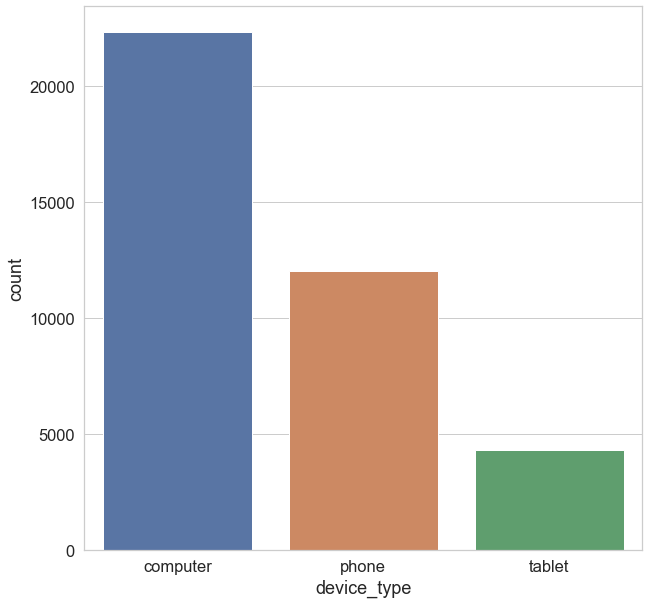

In [30]:
sns.set_theme(style='whitegrid', font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='device_type', data=daily)

### Majority of users were on computers.

In [31]:
# device_type
group_num = len(pd.unique(daily.device_type))
group = pd.unique(daily.device_type)

output_notebook()

for cls in group:
    daily_cls = daily.loc[daily.device_type==cls]
    weekly_cls = daily_cls.set_index('occurred_at').groupby(pd.Grouper(freq='W')).user_id.nunique()
    x = weekly_cls.index
    y = weekly_cls.values
    fig = figure(plot_width=500, plot_height=300, x_axis_type='datetime',
             title='Count of weekly active users',
             y_axis_label='Counts', x_axis_label='Time (weekly)')
    fig.scatter(x, y)
    fig.line(x, y)
    print(cls)
    show(fig)

Loading BokehJS ...

computer


phone


tablet


# The incident has less impact on computer users than phone and tablet users.

In [32]:
df_email.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


In [33]:
pd.unique(df_email.action)

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

In [34]:
# device_type
group_num = len(pd.unique(df_email.action))
group = pd.unique(df_email.action)

output_notebook()

for cls in group:
    daily_cls = df_email.loc[df_email.action==cls]
    weekly_cls = daily_cls.set_index('occurred_at').groupby(pd.Grouper(freq='W')).user_id.nunique()
    x = weekly_cls.index
    y = weekly_cls.values
    fig = figure(plot_width=500, plot_height=300, x_axis_type='datetime',
             title='Count of weekly active users',
             y_axis_label='Counts', x_axis_label='Time (weekly)')
    fig.scatter(x, y)
    fig.line(x, y)
    print(cls)
    show(fig)

Loading BokehJS ...

sent_weekly_digest


email_open


email_clickthrough


sent_reengagement_email


# It appears that the email clickthrough is strongly associated with the incident.